In [1]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np # Mathematical Calculations
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC# Spot Check Algorithms
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = "./data/Assignment_PA.csv"

In [3]:
df = pd.read_csv(data)

# EDA

In [4]:
len(df) #Number of rows in the Dataframe

1941

In [5]:
df.shape # number of rows and columns

(1941, 34)

In [6]:
df.head() # first 5 records

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [7]:
df.tail() #last 5 records

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,2
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,2
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,2
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,2
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,2


In [8]:
df.info() #information regarding the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [9]:
df.describe() # Get the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,1.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [10]:
round(df.describe().T,2) #Transpose and rounding it off to 2  for better readability

,count,mean,std,min,25%,50%,75%,max
V1,1941.0,571.14,520.69,0.00,51.00,435.00,1053.00,1705.00
V2,1941.0,617.96,497.63,4.00,192.00,467.00,1072.00,1713.00
V3,1941.0,1650684.87,1774578.41,6712.00,471253.00,1204128.00,2183073.00,12987661.00
V4,1941.0,1650738.71,1774590.09,6724.00,471281.00,1204136.00,2183084.00,12987692.00
V5,1941.0,1893.88,5168.46,2.00,84.00,174.00,822.00,152655.00
V6,1941.0,111.86,301.21,2.00,15.00,26.00,84.00,10449.00
V7,1941.0,82.97,426.48,1.00,13.00,25.00,83.00,18152.00
V8,1941.0,206312.15,512293.59,250.00,9522.00,19202.00,83011.00,11591414.00
V9,1941.0,84.55,32.13,0.00,63.00,90.00,106.00,203.00
V10,1941.0,130.19,18.69,37.00,124.00,127.00,140.00,253.00


In [11]:
df.info() # info to check the name change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [12]:
df.Class.unique() #unique values in the Class Column 

array([1, 2])

In [13]:
df.Class.value_counts()  # The number of records for 1 and 2 in Class

1    1268
2     673
Name: Class, dtype: int64

In [14]:
df.nunique() # check the categorical Variable #All with only 2 unique records are categorical

V1        962
V2        994
V3       1939
V4       1940
V5        920
V6        399
V7        317
V8       1909
V9        161
V10       100
V11        84
V12         2
V13         2
V14        24
V15      1387
V16      1338
V17       770
V18       454
V19       818
V20       648
V21         3
V22       914
V23       183
V24       217
V25       918
V26      1522
V27       388
V28         2
V29         2
V30         2
V31         2
V32         2
V33         2
Class       2
dtype: int64

In [15]:
df.duplicated().sum() #Any duplicated values ? No

0

In [16]:
df.skew() #skewness of the data : Observation: V1 and V2 are nearly similar . V3 and V4 are also very similar . 
#V13 and V12 are negatively correlated

V1        0.500897
V2        0.524210
V3        2.811213
V4        2.811169
V5       14.083822
V6       21.539451
V7       39.293158
V8        7.730720
V9       -0.107098
V10       1.287035
V11       0.851422
V12       0.407249
V13      -0.407249
V14       2.206935
V15       0.685771
V16       0.293468
V17      -0.056306
V18       5.181830
V19      -0.235096
V20      -0.928582
V21      -0.306422
V22       0.748284
V23       1.001014
V24       0.445101
V25      -0.153446
V26       0.679339
V27       0.125789
V28       3.063973
V29       2.708438
V30       1.489927
V31       4.902448
V32       5.689472
V33       1.446652
Class     0.644593
dtype: float64

In [17]:
df[['V12','V13','V28','V29','V30','V31','V32','V33','Class'] ]= df[['V12','V13','V28','V29','V30','V31','V32','V33','Class']].astype('object') #make categorical Variable to object

In [18]:
#making the categorical variables as data type object for further EDA in the above 

In [19]:
df.info() #Check data type after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   object 
 12  V13     1941 non-null   object 
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

# Visualization

In [20]:
round(df.corr(),2) #only comparision of numeric values 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
V1,1.00,0.99,0.04,0.04,-0.31,-0.26,-0.12,-0.34,0.24,-0.08,...,-0.36,0.15,0.37,0.15,-0.43,-0.44,-0.33,0.18,-0.03,-0.36
V2,0.99,1.00,0.05,0.05,-0.23,-0.19,-0.09,-0.25,0.17,-0.06,...,-0.21,0.15,0.27,0.10,-0.33,-0.32,-0.27,0.12,-0.04,-0.29
V3,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,0.05,0.07,-0.04,-0.06,0.04,0.07,-0.01,-0.09,-0.09,0.03
V4,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,0.05,0.07,-0.04,-0.06,0.04,0.07,-0.01,-0.09,-0.09,0.03
V5,-0.31,-0.23,0.02,0.02,1.00,0.97,0.83,0.98,-0.50,0.11,...,0.59,-0.29,-0.46,-0.11,0.65,0.60,0.58,-0.14,-0.04,0.42
V6,-0.26,-0.19,0.02,0.02,0.97,1.00,0.91,0.91,-0.40,0.11,...,0.52,-0.29,-0.41,-0.08,0.56,0.52,0.52,-0.10,-0.03,0.38
V7,-0.12,-0.09,0.02,0.02,0.83,0.91,1.00,0.70,-0.21,0.06,...,0.21,-0.20,-0.14,0.01,0.29,0.23,0.34,0.03,-0.05,0.19
V8,-0.34,-0.25,0.01,0.01,0.98,0.91,0.70,1.00,-0.54,0.14,...,0.66,-0.33,-0.53,-0.12,0.71,0.67,0.62,-0.16,-0.01,0.46
V9,0.24,0.17,-0.07,-0.07,-0.50,-0.40,-0.21,-0.54,1.00,0.43,...,-0.49,0.25,0.32,0.04,-0.68,-0.57,-0.59,0.06,0.67,-0.51
V10,-0.08,-0.06,-0.07,-0.07,0.11,0.11,0.06,0.14,0.43,1.00,...,0.10,0.09,-0.17,-0.12,0.01,0.09,-0.07,-0.17,0.87,-0.04


<AxesSubplot:>

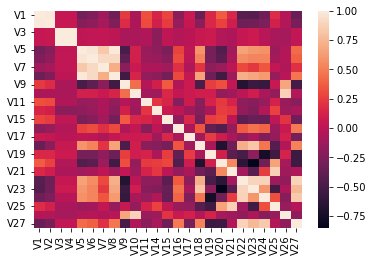

In [21]:
sns.heatmap(df.corr()) #Correlation Visualization

In [22]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns
#loading columns to different variable for easier reference in EDA

In [23]:
import warnings
warnings.simplefilter(action='ignore')

In [24]:
#Analysis of Categorical Columns (dtype = object)

In [25]:
cat_columns

Index(['V12', 'V13', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'Class'], dtype='object')

In [26]:
scol=df[cat_columns]
df_catcolumn=scol.copy()
df_catcolumn=df_catcolumn.drop(['Class'], axis = 1)
df_catcolumn #Categorical columns without Target

,V12,V13,V28,V29,V30,V31,V32,V33
0,1,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1936,0,1,0,0,0,0,0,0
1937,0,1,0,0,0,0,0,0
1938,0,1,0,0,0,0,0,0
1939,0,1,0,0,0,0,0,0


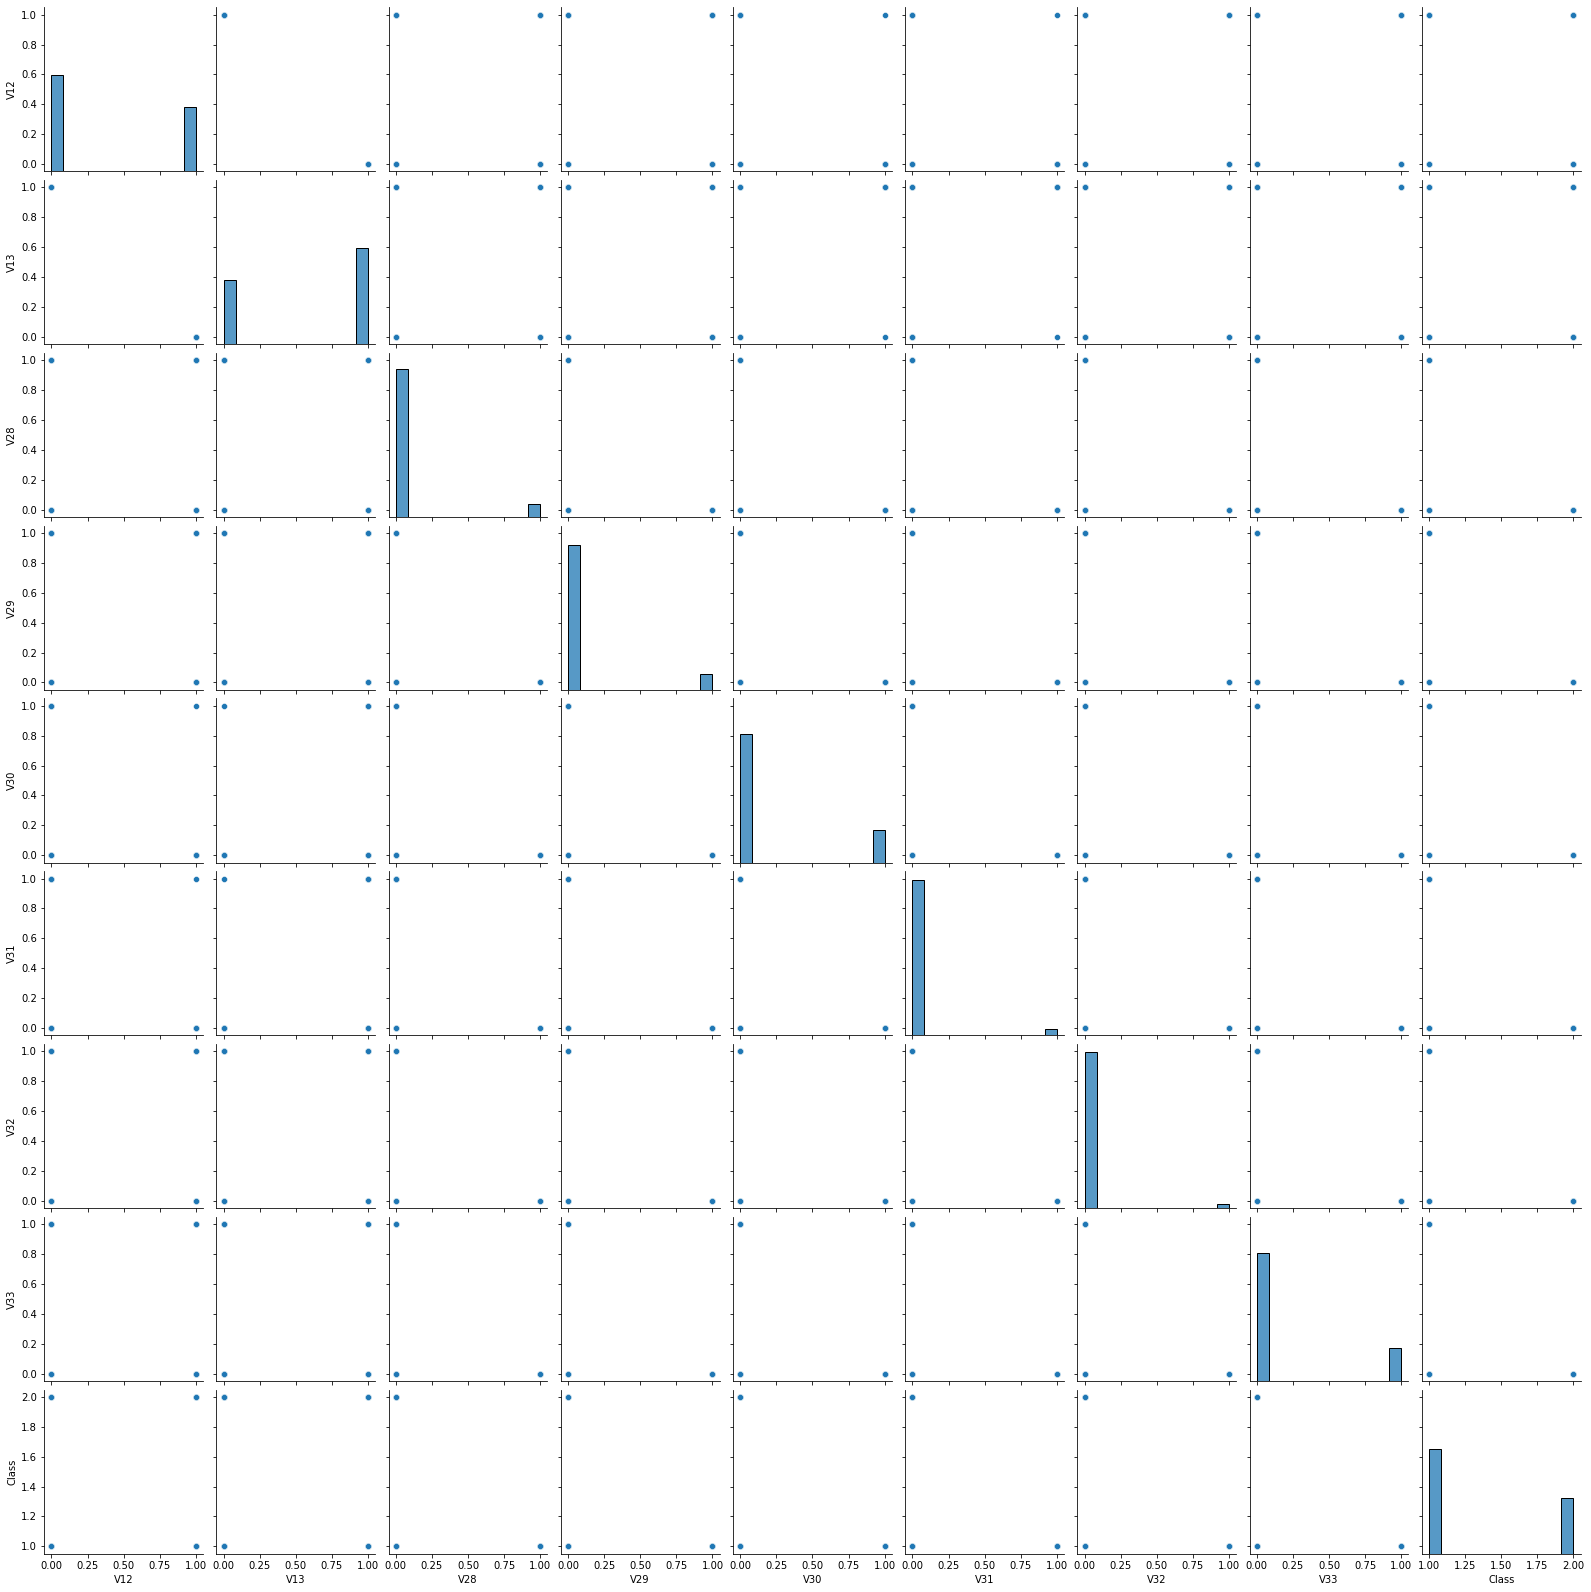

In [27]:
sns.pairplot(df[cat_columns]) #Pairplot for only the categorical columns

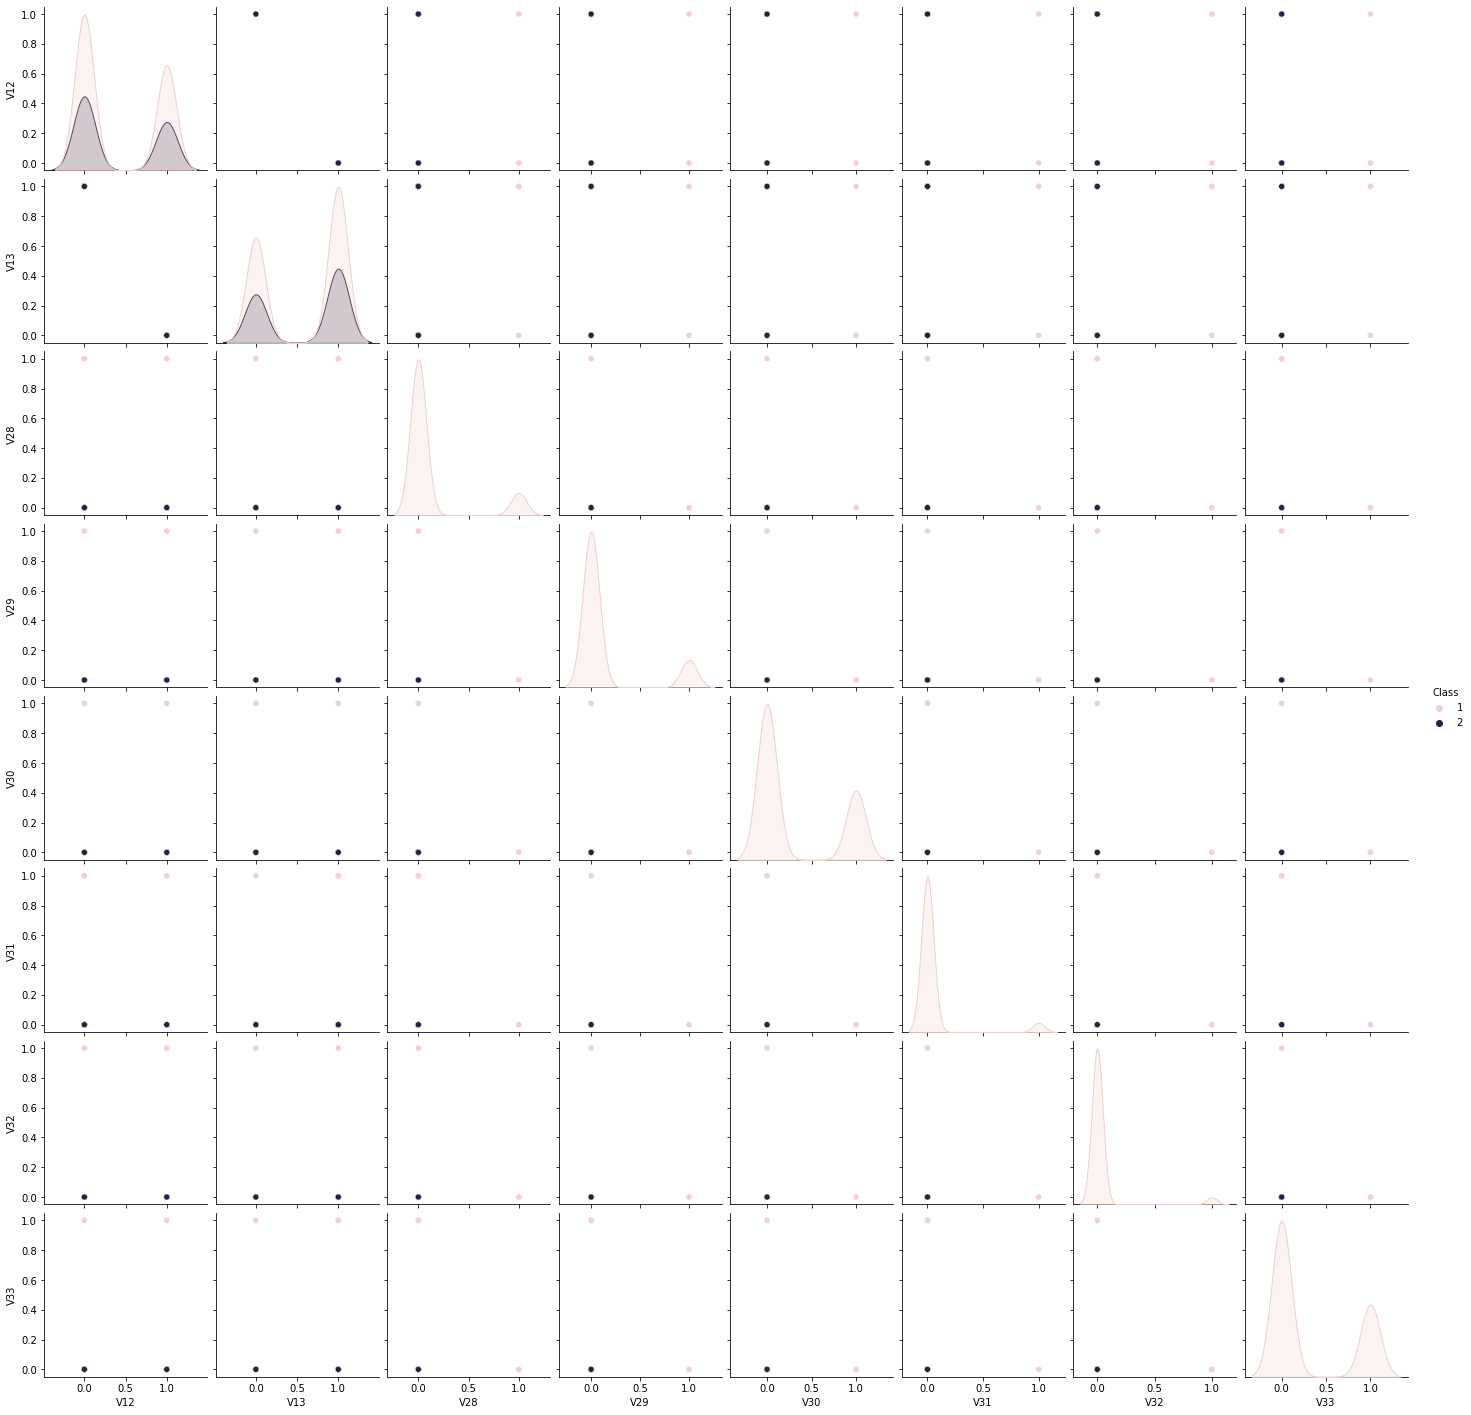

In [28]:
sns.pairplot(df[cat_columns], hue="Class") #Categorical columns wrt to Class

In [29]:
#Analsysis of Numerical Columns

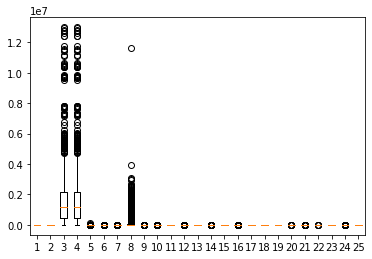

In [30]:
plt.boxplot(df[num_columns]) # box plot on Numerical values
plt.show()

In [31]:
#Observation from the box plot : V8 has obvious outliers even V3 and V4 . So we need to remove the outliers to clean the data . 
#It will be done at a later step

In [32]:
num_columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27'],
      dtype='object')

In [33]:
#The outliers can also be seen through the scatter plot

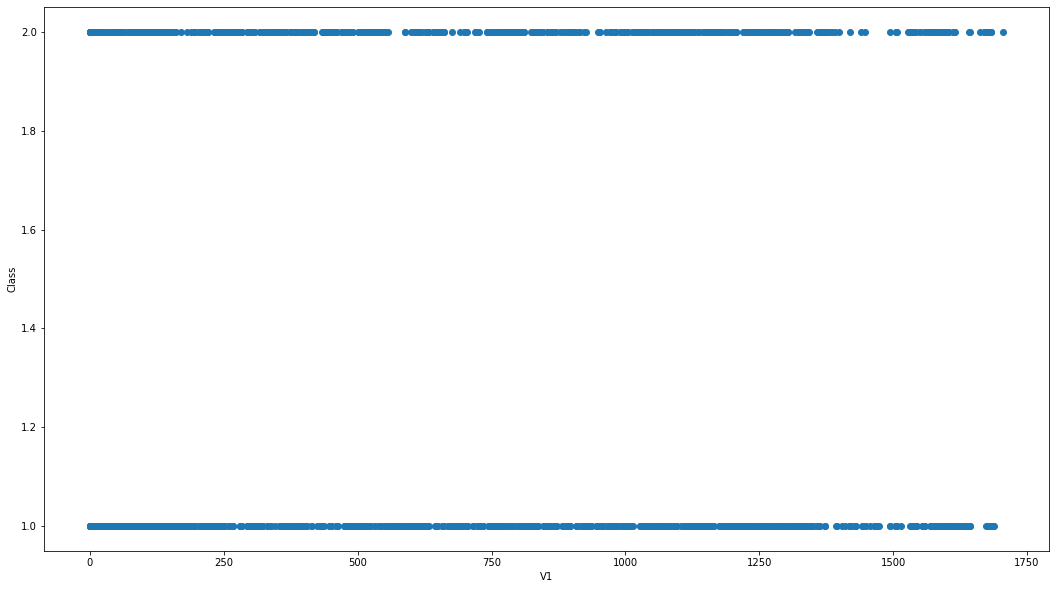

In [34]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['V1'], df['Class'])
 
# x-axis label
ax.set_xlabel('V1')
 
# y-axis label
ax.set_ylabel('Class')
plt.show()

#Observation: V1 and Class relation

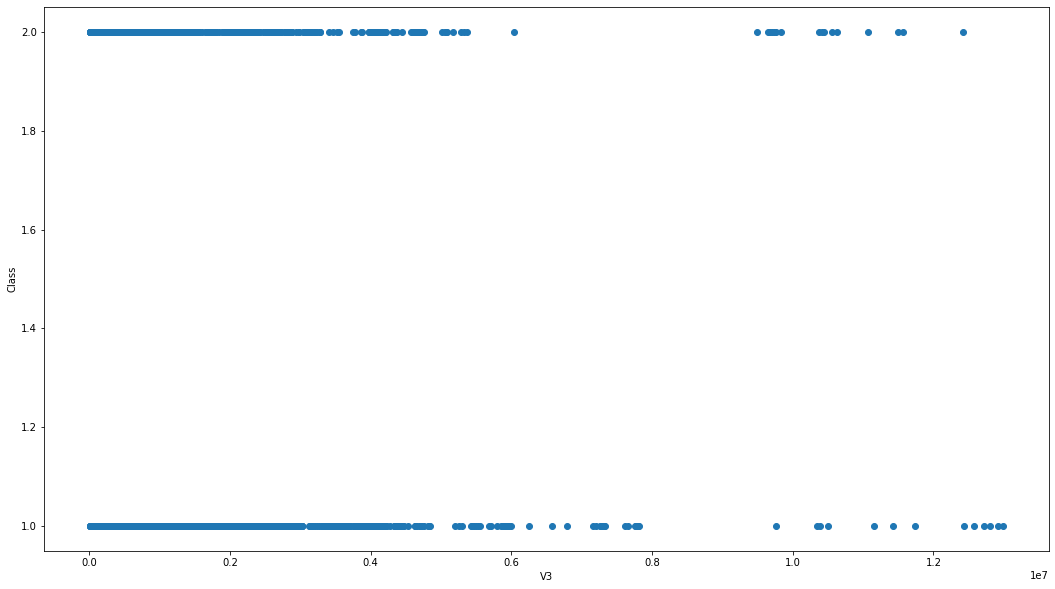

In [35]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['V3'], df['Class'])
 
# x-axis label
ax.set_xlabel('V3')
 
# y-axis label
ax.set_ylabel('Class')
plt.show()

#Comparing V3 wrt to Class

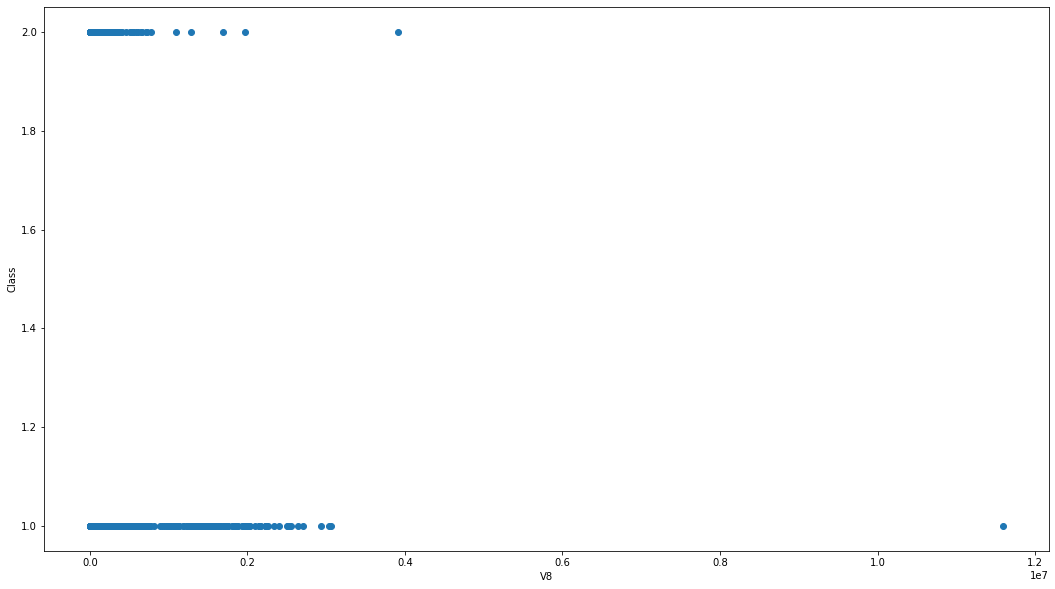

In [36]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['V8'], df['Class'])
 
# x-axis label
ax.set_xlabel('V8')
 
# y-axis label
ax.set_ylabel('Class')
plt.show()

#V8 wrt to Class

In [37]:
#Now we focus on removing outliers : Z score method and IQR method is available.

# Data Pre-Processing
1.Handling Outliers 2.Feature Selection

# Outliers Handling

In [38]:
z = np.abs(stats.zscore(df[num_columns]))
print(z)

#z score to find outliers . Found the z score but not using it in the current project to find outliers. 
#Dont see any values with 3 o \r -3

            V1        V2        V3        V4        V5        V6        V7  \
0     1.016481  1.141639  0.777729  0.777729  0.314852  0.314996  0.091389   
1     0.141894  0.066403  0.500188  0.500171  0.345623  0.338242  0.124225   
2     0.495362  0.436253  0.054546  0.054566  0.352784  0.344883  0.150024   
3     0.541467  0.486504  0.722225  0.722225  0.332463  0.328279  0.089044   
4     1.379032  1.382988  0.649678  0.649559  0.099692  0.172201  0.415209   
...        ...       ...       ...       ...       ...       ...       ...   
1936  0.618830  0.685357  0.746795  0.746811  0.313690  0.192126  0.142987   
1937  0.820537  0.890382  0.738452  0.738468  0.310981  0.225334  0.138297   
1938  0.818616  0.892392  0.712412  0.712430  0.310013  0.238617  0.142987   
1939  0.833984  0.900432  0.692280  0.692288  0.285435  0.049331  0.084353   
1940  1.325243  1.332737  0.880850  0.880865  0.346591  0.285109  0.142987   

            V8        V9       V10  ...       V18       V19    

In [39]:
#Using the IQR to find the outliers. So in this printing the IQR
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

V1     1.002000e+03
V2     8.800000e+02
V3     1.711820e+06
V4     1.711803e+06
V5     7.380000e+02
V6     6.900000e+01
V7     7.000000e+01
V8     7.348900e+04
V9     4.300000e+01
V10    1.600000e+01
V11    2.920000e+02
V14    4.000000e+01
V15    5.134000e-01
V16    1.858000e-01
V17    4.569000e-01
V18    1.690000e-02
V19    3.882000e-01
V20    4.032000e-01
V21    1.000000e+00
V22    9.906000e-01
V23    5.185000e-01
V24    6.532000e-01
V25    8.449000e-01
V26    1.284000e-01
V27    7.516000e-01
dtype: float64


In [40]:
#Using IQR method for outliers. Replacing the outliers with NULL
for var in num_columns:
    for x in [var]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

In [41]:
df.isnull().sum() #outliers have been updated with NULL

V1         0
V2         0
V3        81
V4        81
V5       395
V6       352
V7       179
V8       399
V9        20
V10      146
V11        0
V12        0
V13        0
V14      240
V15        0
V16       20
V17        0
V18      370
V19        0
V20        0
V21        0
V22        6
V23       34
V24        4
V25        0
V26      134
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
Class      0
dtype: int64

In [42]:
# Using mean to impute the missing values

#1.The outliers have been converted to null . 
#2.So these NULLs are treated as Missing Values . 
#3.There are different ways to replace the missing values. Mean , Median , Mode, etc 
#4.Here, replacing it with mean.

In [43]:
for var in num_columns:
    for i in [var]:
        df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [44]:
df.isnull().sum() #NULL updated with mean

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
Class    0
dtype: int64

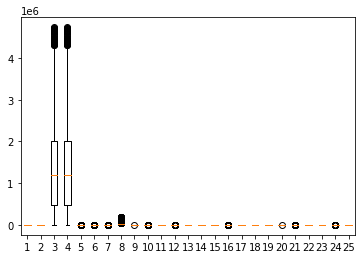

In [45]:
plt.boxplot(df[num_columns]) # box plot on Numerical values after removing the outliers
plt.show()

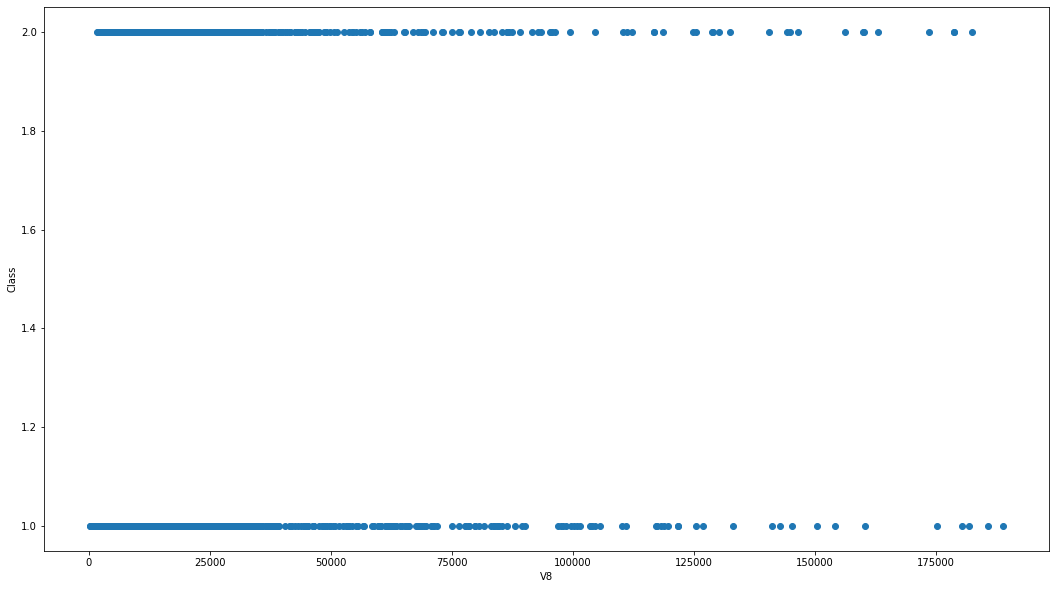

In [46]:
# Scatter plot  #The V8 values after outlier removal
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['V8'], df['Class'])
 
# x-axis label
ax.set_xlabel('V8')
 
# y-axis label
ax.set_ylabel('Class')
plt.show()

#V8 wrt to Class

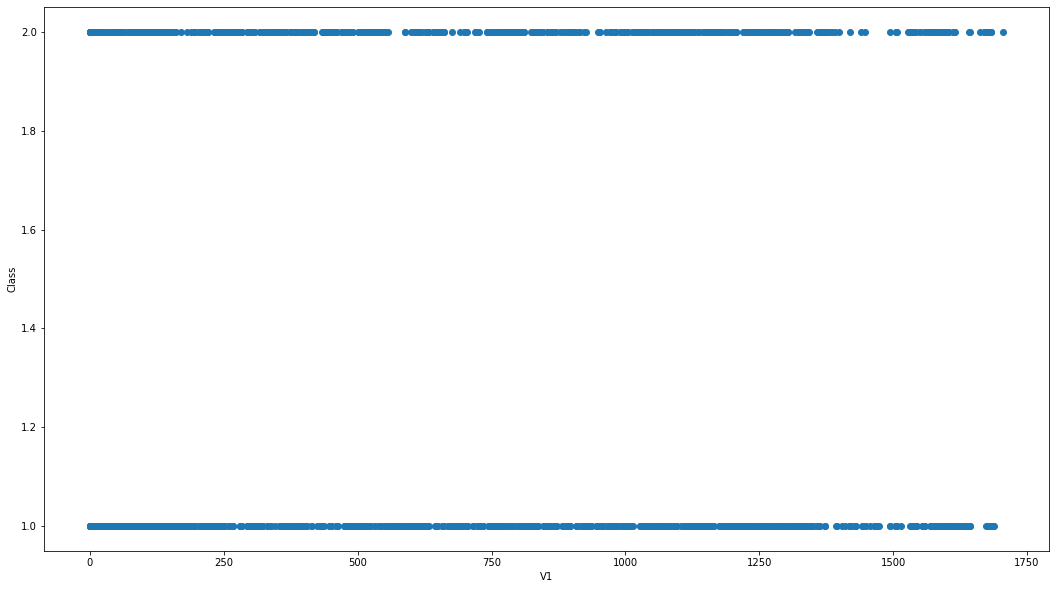

In [47]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['V1'], df['Class'])
 
# x-axis label
ax.set_xlabel('V1')
 
# y-axis label
ax.set_ylabel('Class')
plt.show()

#Observation: V1 and Class relation

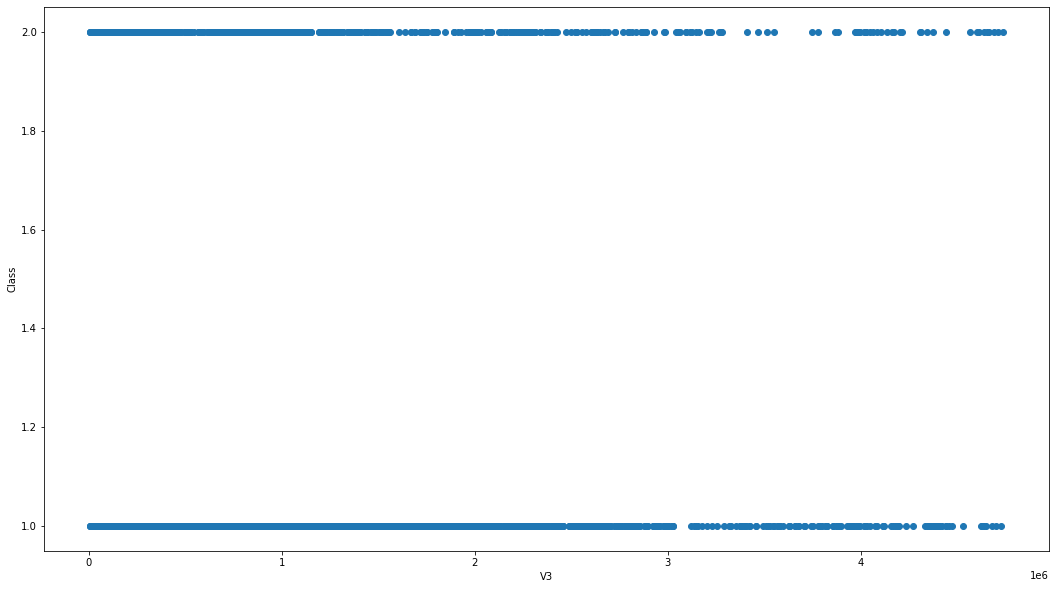

In [48]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['V3'], df['Class'])
 
# x-axis label
ax.set_xlabel('V3')
 
# y-axis label
ax.set_ylabel('Class')
plt.show()

#Comparing V3 wrt to Class

# Feature Selection

In [49]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42.0,50.0,270900.0,270944.0,267.000000,17.0,44.00000,24220.000000,76.0,108.0,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645.0,651.0,2538079.0,2538108.0,108.000000,10.0,30.00000,11397.000000,84.0,123.0,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829.0,835.0,1553913.0,1553931.0,71.000000,8.0,19.00000,7972.000000,99.0,125.0,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853.0,860.0,369370.0,369415.0,176.000000,13.0,45.00000,18996.000000,99.0,126.0,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289.0,1306.0,498078.0,498335.0,237.214748,60.0,41.15664,24633.116083,37.0,126.0,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [50]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33']

In [51]:
X = df[features]
y = df["Class"]

In [52]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42.0,50.0,270900.0,270944.0,267.000000,17.0,44.00000,24220.000000,76.0,108.0,...,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0
1,645.0,651.0,2538079.0,2538108.0,108.000000,10.0,30.00000,11397.000000,84.0,123.0,...,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0
2,829.0,835.0,1553913.0,1553931.0,71.000000,8.0,19.00000,7972.000000,99.0,125.0,...,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0
3,853.0,860.0,369370.0,369415.0,176.000000,13.0,45.00000,18996.000000,99.0,126.0,...,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0
4,1289.0,1306.0,498078.0,498335.0,237.214748,60.0,41.15664,24633.116083,37.0,126.0,...,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0


In [53]:
# For selecting right Features for Modelling we can use Zero Variance Method 

In [54]:
# Get Zero Variance Features
sel = VarianceThreshold(threshold=0)
sel.fit_transform(X)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [55]:
X.columns[sel.get_support()]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33'],
      dtype='object')

In [56]:
# Remove Columns which are zero variance
constant_columns = [column for column in X.columns
                    if column not in X.columns[sel.get_support()]]

print(len(constant_columns))

0


In [57]:
# Note: In this dataset there isn't anything with zero variance so above operation is useless

In [58]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42.0,50.0,270900.0,270944.0,267.000000,17.0,44.00000,24220.000000,76.0,108.0,...,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0
1,645.0,651.0,2538079.0,2538108.0,108.000000,10.0,30.00000,11397.000000,84.0,123.0,...,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0
2,829.0,835.0,1553913.0,1553931.0,71.000000,8.0,19.00000,7972.000000,99.0,125.0,...,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0
3,853.0,860.0,369370.0,369415.0,176.000000,13.0,45.00000,18996.000000,99.0,126.0,...,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0
4,1289.0,1306.0,498078.0,498335.0,237.214748,60.0,41.15664,24633.116083,37.0,126.0,...,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0


In [59]:
# Since the above method for feature selection didn't work, we would look for other options. 
# We will now use decision tree method for find relevant features which would impact the class. 

In [60]:
assignment_model = DecisionTreeRegressor(random_state=1)

In [61]:
assignment_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [62]:
assignment_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21238456, 0.1779785 , 0.22799094,
       0.12735983, 0.11564786, 0.13863831])

In [63]:
#From the above we can very well see that only last 6 features are relevant. 
#We should consider only these features (V28, V29, V30, V31, V32, V33) and check on different models. 

In [64]:
# Final Feature set
final_features = ['V28', 'V29', 'V30', 'V31', 'V32', 'V33']
X = df[final_features]

In [65]:
X

,V28,V29,V30,V31,V32,V33
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1936,0,0,0,0,0,0
1937,0,0,0,0,0,0
1938,0,0,0,0,0,0
1939,0,0,0,0,0,0


In [66]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1936    2
1937    2
1938    2
1939    2
1940    2
Name: Class, Length: 1941, dtype: object

In [67]:
#Also Above made the Categorical columns to int type since we need to use them in Models to Test

In [68]:
df[['V28','V29','V30','V31','V32','V33','Class'] ]= df[['V28','V29','V30','V31','V32','V33','Class']].astype('int64') #make categorical Variable to int

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   float64
 1   V2      1941 non-null   float64
 2   V3      1941 non-null   float64
 3   V4      1941 non-null   float64
 4   V5      1941 non-null   float64
 5   V6      1941 non-null   float64
 6   V7      1941 non-null   float64
 7   V8      1941 non-null   float64
 8   V9      1941 non-null   float64
 9   V10     1941 non-null   float64
 10  V11     1941 non-null   float64
 11  V12     1941 non-null   object 
 12  V13     1941 non-null   object 
 13  V14     1941 non-null   float64
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [70]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Machine Learning Models

In [71]:
df1 = pd.read_csv(data)
# final_features = ['V28', 'V29', 'V30', 'V31', 'V32', 'V33']
X1 = df1[final_features]
y1 = df["Class"]
train_X, val_X, train_y, val_y = train_test_split(X1, y1, random_state = 0)

In [72]:
# Model 1 : RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

0.6666666666666666
[[324   0]
 [162   0]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80       324
           2       0.00      0.00      0.00       162

    accuracy                           0.67       486
   macro avg       0.33      0.50      0.40       486
weighted avg       0.44      0.67      0.53       486



In [74]:
# LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

0.6666666666666666
[[324   0]
 [162   0]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80       324
           2       0.00      0.00      0.00       162

    accuracy                           0.67       486
   macro avg       0.33      0.50      0.40       486
weighted avg       0.44      0.67      0.53       486



In [75]:
# LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [76]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [77]:
#3.KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [78]:
#5.GaussianNB
model = GaussianNB()
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [79]:
#6.SVC
model = SVC(gamma='auto')
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [80]:
#7.BaggingClassifier
model = BaggingClassifier()
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [81]:
#8.SGDClassifier
model = SGDClassifier()
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [82]:
#9.MLPClassifier
model = MLPClassifier(alpha=1, max_iter=1000)
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [83]:
#10.GaussianProcessClassifier
model = GaussianProcessClassifier(1.0 * RBF(1.0))
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [84]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state=0)
model.fit(train_X, train_y)
predictions = model.predict(val_X)
# Evaluate predictions
print(accuracy_score(val_y, predictions))
print(confusion_matrix(val_y, predictions))
print(classification_report(val_y, predictions))

1.0
[[324   0]
 [  0 162]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       162

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486

